# **Supercar recognizer**
The goal of this project is to classify 20 different types of Supercars. The types are following:


1. McLaren F1
2. Ferrari Enzo
3. Ferrari LaFerrari
4. McLaren P1
5. Porsche 918 Spyder
6. Ferrari SF90 Stradale
7. Aston Martin Valkyrie
8. Rimac Nevera
9. Mercedes-AMG One
10. Koenigsegg Jesko
11. Ferrari Daytona SP3
12. Hennessey Venom F5 Roadster
13. Koenigsegg Gemera
14. Lamborghini Revuelto
15. Porsche 911 GT3 RS
16.  Zenvo Aurora
17. Pagani Zonda
18. Ford GT
19. Bugatti Chiron
20. Lamborghini Aventador


# **Setting up Necessary Things**

In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline
bs = 8 # batch size

In [2]:
!pip install -Uqq fastai fastbook nbdev

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 719.8/719.8 kB 5.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.1/67.1 kB 4.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 542.0/542.0 kB 11.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.8/60.8 kB 7.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 83.0/83.0 kB 3.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.3/21.3 MB 35.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 13.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 18.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 16.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 66.2 MB/s eta 0:00:00


In [3]:
from fastai import *
from fastbook import *
from fastai.vision.all import *

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
%cd /content/drive/My Drive/MasterCourse/Supercar Recognizer

/content/drive/My Drive/MasterCourse/Supercar Recognizer


# **Download Images from browser**

In [6]:
doc(search_images_ddg)

In [7]:
car_labels = [
    "McLaren Senna",
    "Ferrari Enzo",
    "Ferrari LaFerrari",
    "McLaren P1",
    "Porsche 918 Spyder",
    "Ferrari SF90 Stradale",
    "Aston Martin Valkyrie",
    "Rimac Nevera",
    "Mercedes-AMG One",
    "Koenigsegg Jesko",
    "Ferrari Daytona SP3",
    "Hennessey Venom F5 Roadster",
    "Koenigsegg Gemera",
    "Lamborghini Revuelto",
    "Porsche 911 GT3 RS",
    "Zenvo Aurora",
    "Pagani Zonda",
    "Ford GT",
    "Bugatti Chiron",
    "Lamborghini Aventador"
]
len(car_labels)

20

In [8]:
images = search_images_ddg(car_labels[0])
f"No of Images => {len(images)} -- One Image URL => {images[0]}"

'No of Images => 200 -- One Image URL => https://www.6speedonline.com/wp-content/uploads/2018/08/IMG_20180824_092143780_HDR.jpg'

In [9]:
doc(download_url)

In [10]:
dest = "McLaren Senna.jpg"
download_url(images[1], dest, show_progress=False)

Path('McLaren Senna.jpg')

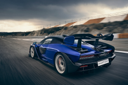

In [12]:
image = Image.open(dest)
image.to_thumb(128, 128)

In [13]:
data_path = "data"
if not os.path.exists(data_path):
  os.mkdir(data_path)

for car_type in car_labels:

  dest = f"{data_path}/{car_type}"
  if not os.path.exists(dest):
    os.mkdir(dest)

  try:
    car_image_urls = search_images_ddg(car_type)
    download_images(dest, urls = car_image_urls)

  except:
    continue

In [14]:
image_counts = get_image_files(data_path)
image_counts

(#3693) [Path('data/McLaren Senna/c38b3777-a215-45d3-8c48-e82f4bdea01c.jpg'),Path('data/McLaren Senna/146846e1-45af-4120-a517-56ee46138ab2.jpg'),Path('data/McLaren Senna/7b03097d-5063-41bf-8f72-0fe9428d1243.jpg'),Path('data/McLaren Senna/ac7704f3-29a0-43e3-8b43-67a15d207d87.jpg'),Path('data/McLaren Senna/2f5972f7-1b97-4f8d-8cb0-8eac8a83bb24.jpg'),Path('data/McLaren Senna/742c0bdd-5307-478c-9cb4-37f9441bcf03.jpg'),Path('data/McLaren Senna/45b178dc-d37a-4feb-b0a2-d28be4d123de.jpg'),Path('data/McLaren Senna/c1c3b7c4-72d3-4c3e-9553-78d3ac2ec583.jpg'),Path('data/McLaren Senna/086664ce-f4e3-4e7b-b224-07dbe281fd74.jpg'),Path('data/McLaren Senna/de46948f-9962-407d-9d2b-e6e67ffcdec6.jpg')...]

In [15]:
failed = verify_images(image_counts)
failed

(#166) [Path('data/McLaren Senna/781a3e11-c4c5-4338-8d36-a9a84a2bacba.jpg'),Path('data/McLaren Senna/421c73b3-a5aa-47fc-a669-cb261be0c495.jpg'),Path('data/McLaren Senna/f32aecff-3736-49e0-be01-125133763003.jpg'),Path('data/McLaren Senna/987e5c9b-0dee-4090-bd5e-d8f8ed653575.jpg'),Path('data/Ferrari Enzo/848c4df2-a31d-465d-ab82-dca1d877b045.jpg'),Path('data/Ferrari Enzo/105403e8-ece6-4c2e-ac8e-30e335cfba09.jpg'),Path('data/Ferrari Enzo/0ac34c1f-bbbe-4b69-a692-9fde935203e4.jpg'),Path('data/Ferrari Enzo/bc17ccad-2e5e-49f6-b980-7d1f79e129eb.jpg'),Path('data/Ferrari Enzo/1687561a-3086-4cb7-915f-0601efc9811e.jpg'),Path('data/Ferrari Enzo/e3581091-e298-4c84-a278-ec8c77b3ed06.jpg')...]

In [16]:
failed.map(Path.unlink)

(#166) [None,None,None,None,None,None,None,None,None,None...]

# **From Data to Dataloaders**

In [17]:
doc(get_image_files)

In [18]:
dblock = DataBlock(
    blocks=(ImageBlock, CategoryBlock),
    get_items=get_image_files,                        # get_image_files returns a list of all images in that path recursively by default
    splitter=RandomSplitter(valid_pct=0.1, seed=42),  # getting 90-10 train-validation split
    get_y=parent_label,                               # taking the folder name as labels
    item_tfms=Resize(128))                            # resizing to get the image of same shape

In [19]:
dls = dblock.dataloaders(data_path,bs=bs)             # setting up batch size for efficient GPU use

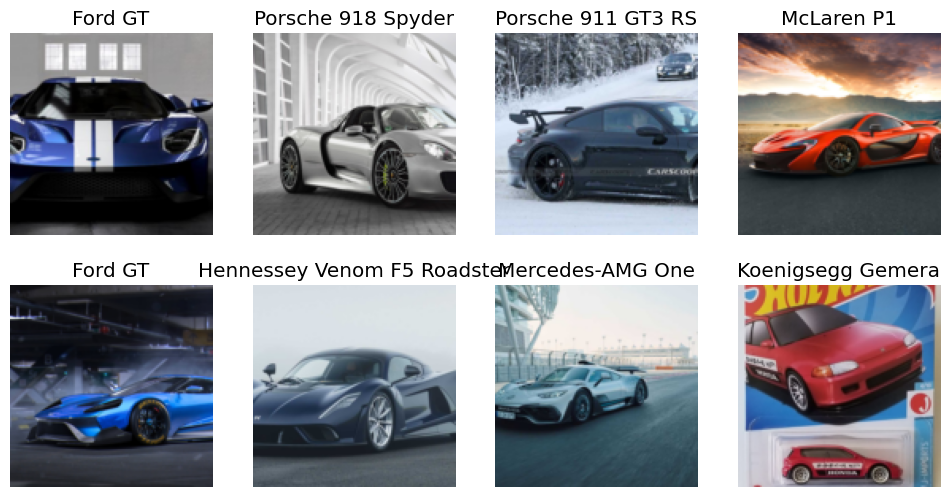

In [20]:
dls.train.show_batch(max_n=8, nrows=2)

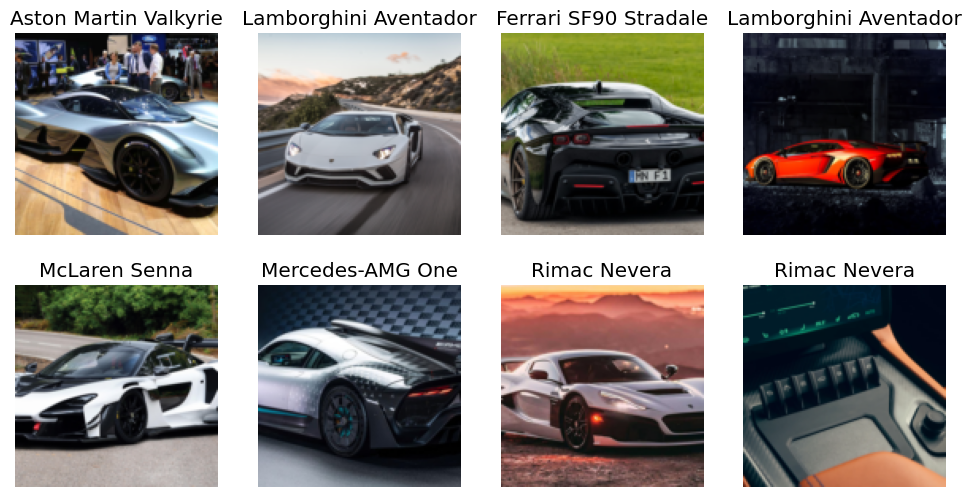

In [21]:
dls.valid.show_batch(max_n=8, nrows=2)

# **Data Augmentation**

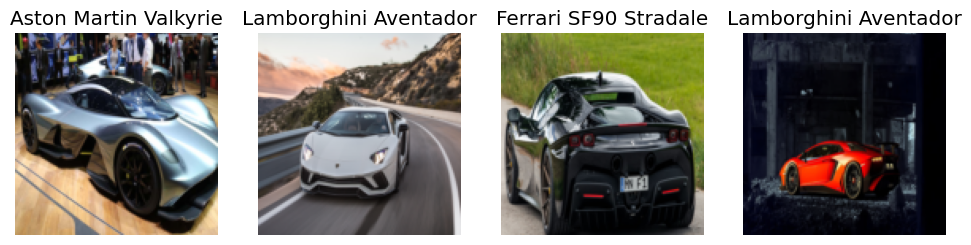

In [22]:
dblock = dblock.new(item_tfms=RandomResizedCrop(128, min_scale=0.3)) # Randomly cropping, cutting, resizing, coloring parts of image into (128 x 128) size
dls = dblock.dataloaders(data_path)
dls.valid.show_batch(max_n=4, nrows=1)

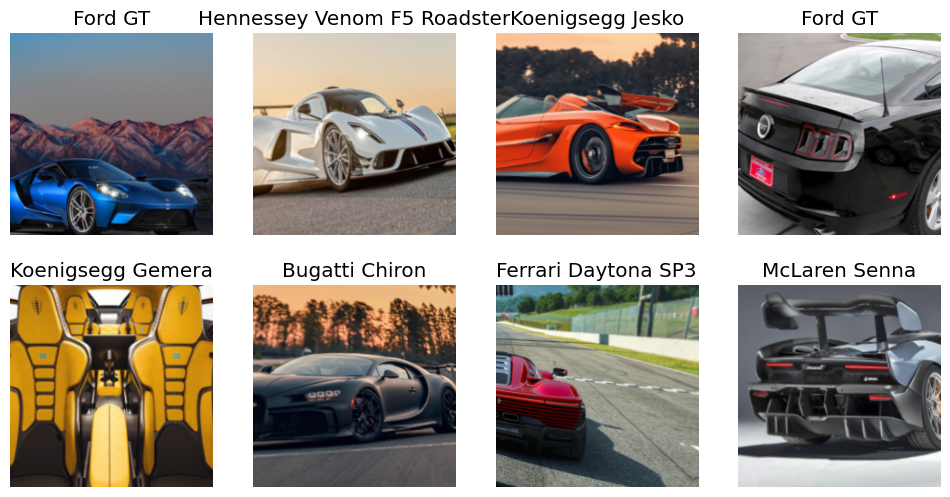

In [23]:
# RandomResizedCrop crops images randomly and create copies so that we don't miss out anything
# aug_transforms is used for image data augmentation
dblock = dblock.new(item_tfms=RandomResizedCrop(224, min_scale=0.5), batch_tfms=aug_transforms())
dls = dblock.dataloaders(data_path)
dls.train.show_batch(max_n=8, nrows=2)

In [24]:
torch.save(dls, "car_dataloader_v0.pkl")